In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
os.getcwd()
lab_path='/content/drive/MyDrive/Github/Yikun-Bai/Sliced Optimal Partial Transport/Code/sopt'
os.chdir(lab_path)


In [ ]:
pip install POT

     |████████████████████████████████| 664 kB 14.2 MB/s 


In [ ]:
import torch
import numpy as np 
import sys
from opt import *
from library import *
import ot 
import matplotlib.pyplot as plt

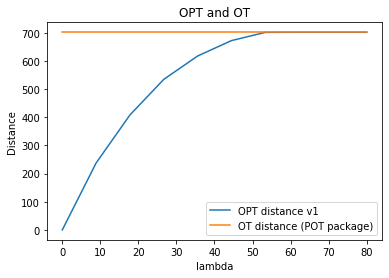

In [ ]:
n=30
m=30
X=np.random.uniform(0,10,size=n)
Y=np.random.uniform(5,15,size=m)
X.sort()
Y.sort()
mu=np.ones(n)
nu=np.ones(m)

M=cost_matrix(X,Y)

cost1=ot.emd2(mu,nu,M)

Lambda_list=np.linspace(0,80,10)
cost2_list=[]
for Lambda in Lambda_list:    
    cost2,L2=opt_1d_v1(X,Y,Lambda)
    cost2_list.append(cost2)
    
plt.plot(Lambda_list,cost2_list,label='OPT distance v1')

plt.plot([Lambda_list[0],Lambda_list[-1]],[cost1,cost1],label='OT distance (POT package)')
plt.xlabel("lambda")
plt.ylabel("Distance")
plt.title("OPT and OT")
plt.legend()
plt.show()


In [ ]:
n=30
m=30
X=np.random.uniform(0,10,size=n)
Y=np.random.uniform(3,15,size=m)
X.sort()
Y.sort()
mu=np.ones(n)
nu=np.ones(m)

cost_matrix=cost_matrix(X,Y)
##cost_matrix=np.zeros([n,m])
for i in range(n):
    for j in range(m):
        cost_matrix[i,j]=cost_function(X[i],Y[j])
cost1,L1=pot_1d(X,Y)

Lambda_list=np.linspace(0,40,60)
cost2_list=[]
for Lambda in Lambda_list:    
    cost2,L2=opt_1d_v1(X,Y,Lambda)
    cost2_list.append(cost2)
    
plt.plot(Lambda_list,cost2_list,label='OPT distance v1')

plt.plot([Lambda_list[0],Lambda_list[-1]],[cost1,cost1],label='POT distance')
plt.xlabel("lambda")
plt.ylabel("Distance")
plt.title("OPT and POT")
plt.legend()
plt.show()

In [ ]:
n=40
m=40
d=4
X=torch.normal(0,1,size=[n,d])
Y=torch.normal(0.5,1.5,size=[m,d])
mu=torch.ones(n)
nu=torch.ones(m)

cost1_list=[]
cost2_list=[]
Lambda_list=np.linspace(0,10,10)
for Lambda in Lambda_list:
    cost1=ot.sliced.sliced_wasserstein_distance(X,Y,mu,nu,n_projections=1000,p=2)
    cost1=cost1**2
    cost2=sliced_opt(X,Y,Lambda,1000)
    cost1_list.append(cost1)
    cost2_list.append(cost2)

plt.plot(Lambda_list,cost1_list,label='sliced OT')
plt.plot(Lambda_list,cost2_list,label='sliced OPT')

plt.xlabel("lambda")
plt.ylabel("Distance")
plt.title("sliced OPT and sliced OT")
plt.legend(loc='best')
plt.show()
